***

Matthew Werner <br>
DAT 512 - Statistical Approaches to Big Data <br>
Unit Project 1 - Buffalo 311 Open Data Analysis

******************************

In [1]:
import pandas as pd
import requests
import numpy as np

# 311 Service Requests API

In [2]:
# Making sure the connection works to 311 dataset
# Checking to see if the data has less than 1000 rows
uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'
r = requests.get(uri)
print('Status code ',r.status_code)
print('Number of rows returned ',len(r.json()))
print('Endoced URI with params ',r.url)

Status code  200
Number of rows returned  1000
Endoced URI with params  https://data.buffalony.gov/resource/whkc-e5vr.json


In [3]:
# Returned exactly 1000 rows
# We most likely have more rows to extract
data311=pd.DataFrame(r.json())
print(data311.shape)
data311.head()

(1000, 48)


,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_eziv_p4ck,:@computed_region_jdfw_hhbp,:@computed_region_urdz_b6n8,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm
0,509589-1001799765,2023-02-12T12:00:00.000,2023-02-25T10:39:00.000,Closed,DPIS,Housing,Open311 Housing,Property,86,AUSTIN,...,72,18,1,2,26,88,277,10,NaN,NaN
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,1358,BROADWAY,...,66,2,11,1,24,70,266,2,NaN,NaN
2,1001760699,2023-01-03T12:06:00.000,2023-01-26T12:56:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Madison St,...,60,8,10,1,35,47,50,4,Peckham St,NaN
3,1001787887,2023-02-02T10:53:00.000,2023-02-22T08:27:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,464,FERRY EAST,...,59,7,6,4,21,11,283,8,NaN,3
4,506083-1001764175,2023-01-12T13:30:00.000,2023-01-17T08:08:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,201,BROADWAY,...,20,15,9,5,8,84,5,4,NaN,NaN


In [4]:
# Pulling in 311 Service Requests API from Open Data Buffalo
# Setting limit parameter in order to extract all of the rows
# Date parameters set to match asssesment data timeframe

params_dict = {
    '$where':'date_extract_y(open_date)>=2021',
    '$where':'date_extract_m(open_date)>=03',
    '$where':'date_extract_y(open_date)<=2022',
    '$where':'date_extract_m(open_date)<03',
    '$limit':150000 # may need to adjust this
}

uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'
r = requests.get(uri, params=params_dict)
print('Status code ',r.status_code)
print('Number of rows returned ',len(r.json()))
print('Endoced URI with params ',r.url)

Status code  200
Number of rows returned  150000
Endoced URI with params  https://data.buffalony.gov/resource/whkc-e5vr.json?%24where=date_extract_m%28open_date%29%3C03&%24limit=150000


In [5]:
# Creating a Pandas dataframe for 311 data
data311=pd.DataFrame(r.json())
print(data311.shape)
data311.head()

(150000, 33)


,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,x_coordinate,y_coordinate,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,address_line_2
0,509589-1001799765,2023-02-12T12:00:00.000,2023-02-25T10:39:00.000,Closed,DPIS,Housing,Open311 Housing,Property,86,AUSTIN,...,-78.90191,42.93874,59,3,3006,005900,36029005900,360290059003,360290059003004,NaN
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,1358,BROADWAY,...,-8774730.591,5296131.1923,28,2,2010,002801,36029002801,360290028011,360290028011005,NaN
2,1001760699,2023-01-03T12:06:00.000,2023-01-26T12:56:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Madison St,...,1076044.9,1052309.9,15,2,2008,001500,36029001500,360290015002,360290015002008,Peckham St
3,1001787887,2023-02-02T10:53:00.000,2023-02-22T08:27:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,464,FERRY EAST,...,NaN,NaN,33.01,3,3007,003301,36029003301,360290033013,360290033013005,NaN
4,506083-1001764175,2023-01-12T13:30:00.000,2023-01-17T08:08:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,201,BROADWAY,...,-78.8656,42.88533,14.02,4,4011,001404,36029001404,360290014042,360290014042010,NaN


## Data Cleaning and Preparation

### Filtering useful columns into new dataframe

In [6]:
# Finding all column names
data311.columns

Index(['case_reference', 'open_date', 'closed_date', 'status', 'subject',
       'reason', 'type', 'object_type', 'address_number', 'address_line_1',
       'city', 'state', 'zip_code', 'property_id', 'location', 'latitude',
       'longitude', 'council_district', 'police_district', 'census_tract',
       'census_block_group', 'census_block', 'neighborhood', 'x_coordinate',
       'y_coordinate', 'census_tract_2010', 'census_block_group_2010',
       'census_block_2010', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block', 'address_line_2'],
      dtype='object')

In [7]:
# Selcting valuable columns
data311 = pd.DataFrame(data311[['case_reference', 'open_date', 'status', 'type', 'zip_code', 'reason']])
data311.head()

,case_reference,open_date,status,type,zip_code,reason
0,509589-1001799765,2023-02-12T12:00:00.000,Closed,Open311 Housing,14207,Housing
1,1001788769,2023-02-07T15:04:00.000,Closed,Totes Replace (Req_Serv),14212,Sanitation
2,1001760699,2023-01-03T12:06:00.000,Closed,Sign Hazards (Req_Serv),14212,Engineering - Traffic
3,1001787887,2023-02-02T10:53:00.000,Closed,Housing Violations (Req_Serv),14208,Housing
4,506083-1001764175,2023-01-12T13:30:00.000,Closed,Parking Issues (Req_Serv),14204,Parking Violations Bureau


In [8]:
# Dataframe shape
data311.shape

(150000, 6)

In [9]:
# remove rows where zipcode = unknown
data311 = data311[data311['zip_code'] != 'UNKNOWN']
data311.head()

,case_reference,open_date,status,type,zip_code,reason
0,509589-1001799765,2023-02-12T12:00:00.000,Closed,Open311 Housing,14207,Housing
1,1001788769,2023-02-07T15:04:00.000,Closed,Totes Replace (Req_Serv),14212,Sanitation
2,1001760699,2023-01-03T12:06:00.000,Closed,Sign Hazards (Req_Serv),14212,Engineering - Traffic
3,1001787887,2023-02-02T10:53:00.000,Closed,Housing Violations (Req_Serv),14208,Housing
4,506083-1001764175,2023-01-12T13:30:00.000,Closed,Parking Issues (Req_Serv),14204,Parking Violations Bureau


In [10]:
# Show if there was a change in the number of rows in the filtered 311 dataset
# Number of rows decreased from original dataframe
data311.shape

(136683, 6)

### One Hot Encoding and Joining to Filtered Dataset

In [11]:
# Creating dummy variables for 'reason' and joining these columns to initial dataset
dummy = pd.get_dummies(data311['reason'], prefix='reason')
data311_with_dummy = data311.join(dummy)
data311_with_dummy.head()

,case_reference,open_date,status,type,zip_code,reason,reason_Adjudication - Ordinance Violation,reason_Administration,reason_Animal Shelter,reason_Assessment,...,reason_Police,reason_Real Estate,reason_Rodent Control,reason_Rodent_Pest Control,reason_Sanitation,reason_Streets,reason_Streets/Sanitation,reason_Taxation,reason_Telecommunications,reason_Youth Bureau
0,509589-1001799765,2023-02-12T12:00:00.000,Closed,Open311 Housing,14207,Housing,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001788769,2023-02-07T15:04:00.000,Closed,Totes Replace (Req_Serv),14212,Sanitation,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1001760699,2023-01-03T12:06:00.000,Closed,Sign Hazards (Req_Serv),14212,Engineering - Traffic,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1001787887,2023-02-02T10:53:00.000,Closed,Housing Violations (Req_Serv),14208,Housing,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,506083-1001764175,2023-01-12T13:30:00.000,Closed,Parking Issues (Req_Serv),14204,Parking Violations Bureau,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Finalizing the 311 Dataset

In [12]:
# Find the count of case_reference per zip code
# Include a sum of all dummy variables for 'reason'
final311 = pd.crosstab(data311_with_dummy.zip_code, data311_with_dummy.reason).join(data311_with_dummy.groupby('zip_code')['case_reference'].count())
final311.head()

,Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,Buffalo Water Authority,Buildings Division,...,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau,case_reference
zip_code,,,,,,,,,,,,,,,,,,,,,
14201,13,7,38,0,0,30,22,35,38,1,...,14,61,36,1622,895,4,5,0,0,5459
14202,14,4,9,4,5,11,19,11,14,24,...,16,11,4,587,257,1,19,0,1,2845
14203,0,1,8,0,0,3,13,9,10,3,...,1,8,0,218,115,2,0,0,0,1397
14204,5,4,45,2,1,15,140,28,56,3,...,15,84,32,1253,455,3,11,0,0,3844
14206,25,7,175,0,0,27,16,127,123,8,...,27,154,71,3461,1359,30,29,0,0,10278


In [13]:
# Rename case_reference to it's actual meaning, 'Number of 311 cases'
final311 = final311.rename(columns = {'case_reference':'Number of 311 cases'})
final311.head()

,Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,Buffalo Water Authority,Buildings Division,...,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau,Number of 311 cases
zip_code,,,,,,,,,,,,,,,,,,,,,
14201,13,7,38,0,0,30,22,35,38,1,...,14,61,36,1622,895,4,5,0,0,5459
14202,14,4,9,4,5,11,19,11,14,24,...,16,11,4,587,257,1,19,0,1,2845
14203,0,1,8,0,0,3,13,9,10,3,...,1,8,0,218,115,2,0,0,0,1397
14204,5,4,45,2,1,15,140,28,56,3,...,15,84,32,1253,455,3,11,0,0,3844
14206,25,7,175,0,0,27,16,127,123,8,...,27,154,71,3461,1359,30,29,0,0,10278


In [14]:
# Reorder column names so that 'number of 311' cases directly follows zip code.
# This should make the dataframe easier to read.
cols = list(final311)
cols.insert(0, cols.pop(cols.index('Number of 311 cases')))
final311 = final311.loc[:, cols]
final311.head()

,Number of 311 cases,Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,Buffalo Water Authority,...,Police,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau
zip_code,,,,,,,,,,,,,,,,,,,,,
14201,5459,13,7,38,0,0,30,22,35,38,...,206,14,61,36,1622,895,4,5,0,0
14202,2845,14,4,9,4,5,11,19,11,14,...,63,16,11,4,587,257,1,19,0,1
14203,1397,0,1,8,0,0,3,13,9,10,...,45,1,8,0,218,115,2,0,0,0
14204,3844,5,4,45,2,1,15,140,28,56,...,70,15,84,32,1253,455,3,11,0,0
14206,10278,25,7,175,0,0,27,16,127,123,...,410,27,154,71,3461,1359,30,29,0,0


# 2021-2022 Assessment Roll API

In [15]:
# Making sure the connection works for Assessment Data
# Checking to see if the data has less than 1000 rows
uri2 = 'https://data.buffalony.gov/resource/2c7u-hywd.json'
r2 = requests.get(uri2)
print('Status code ',r2.status_code)
print('Number of rows returned ',len(r2.json()))
print('Endoced URI with params ',r2.url)

Status code  200
Number of rows returned  1000
Endoced URI with params  https://data.buffalony.gov/resource/2c7u-hywd.json


In [16]:
# Returned exactly 1000 rows
# We most likely have more rows to extract
df_assessment=pd.DataFrame(r2.json())
print(df_assessment.shape)
df_assessment.head()

(1000, 93)


,sbl,tax_district,print_key,front,depth,prop_class_description,previous_property_class,owner1,owner2,mail2,...,exterior_wall_description,heat_type_description,overall_condition_description,previous_number,deed_date,deed_type_description,deed_type_code,fuel_type,zipcode_extension,mail_country
0,7770000043010000,147002,777.00-43-10,0,0,CEILING RAILROAD,842,CON-RAIL,TRANS,CON-RAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1113400004012000,147004,111.34-4-12,24.15,53,RESIDENTIAL VACANT LAND,311,BRUNSON VIOLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008100008039000,147003,100.81-8-39,30,100,RESIDENTIAL VACANT LAND,311,ATKINS MICHAEL D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0895100002001000,147009,89.51-2-1,471.5,211,SCHOOL,612,CITY OF BUFFALO,PUBLIC SCH 54,BOARD OF EDUCATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1113300005061000,147003,111.33-5-61,25,100,RESIDENTIAL VACANT LAND,311,ROBINSON FRANCINE R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Setting parameters for Assessment Data
# Pulling in 2021-2022 Assessment Roll API from Open Data Buffalo
params_dict2 = {
    '$limit':100000
}


uri2 = 'https://data.buffalony.gov/resource/2c7u-hywd.json'
r2 = requests.get(uri2, params=params_dict2)
print('Status code ',r2.status_code)
print('Number of rows returned ',len(r2.json()))
print('Endoced URI with params ',r2.url)

Status code  200
Number of rows returned  93653
Endoced URI with params  https://data.buffalony.gov/resource/2c7u-hywd.json?%24limit=100000


In [18]:
# Setting up pandas dataframe for assessment data
df_assessment=pd.DataFrame(r2.json())
print(df_assessment.shape)
df_assessment.head()

(93653, 93)


,sbl,tax_district,print_key,front,depth,prop_class_description,previous_property_class,owner1,owner2,mail2,...,exterior_wall_description,heat_type_description,overall_condition_description,previous_number,deed_date,deed_type_description,deed_type_code,fuel_type,zipcode_extension,mail_country
0,7770000043010000,147002,777.00-43-10,0,0,CEILING RAILROAD,842,CON-RAIL,TRANS,CON-RAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1113400004012000,147004,111.34-4-12,24.15,53,RESIDENTIAL VACANT LAND,311,BRUNSON VIOLA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008100008039000,147003,100.81-8-39,30,100,RESIDENTIAL VACANT LAND,311,ATKINS MICHAEL D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0895100002001000,147009,89.51-2-1,471.5,211,SCHOOL,612,CITY OF BUFFALO,PUBLIC SCH 54,BOARD OF EDUCATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1113300005061000,147003,111.33-5-61,25,100,RESIDENTIAL VACANT LAND,311,ROBINSON FRANCINE R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Preparation

In [19]:
# Find which types of property to include
df_assessment['prop_class_description'].unique()

array(['CEILING RAILROAD', 'RESIDENTIAL VACANT LAND', 'SCHOOL',
       'APARTMENT', 'CITY/TOWN/VILLAGE PUBLIC PARKS', 'COM VAC W/IMP',
       'TELEPHONE', 'COMMERCIAL VACANT LAND', 'PARKING LOT',
       'TELEPHONE - SPECIAL FRANCHISE', 'MANUFACTURING & PROCESSING',
       'RESIDENTIAL LAND WITH SMALL IMPROVEMENTS', 'OFFICE BUILDING',
       'INDUSTRIAL VACANT LAND', 'DOWNTOWN ROW TYPE (DETACHED)',
       'RELIGIOUS', 'PARKS', 'SMALL GARAGE', 'ONE FAMILY DWELLING',
       'MEDIUM RETAIL', 'TWO FAMILY DWELLING',
       'ONE STORY SMALL STRUCTURE MULTI-OCCUPANT', 'MARINAS',
       'NON-CEILING RAILROADS', 'PARKING LOTS', 'MULTIPLE RESIDENCES',
       'CONVERTED RESIDENCE', 'GAS MEAS STATION',
       'DINERS OR LUNCHEONETTES', 'AUTOMATIC CAR WASH', 'GOLF COURSES',
       'SOCIAL ORGANIZATIONS', 'RESTAURANTS',
       'INNS,LODGES,BOARDING AND ROOMING HOUSES',
       'OTHER STORAGE & WAREHOUSE FACILITIES',
       'RESIDENCE WITH COMMERCIAL USE', 'MISCELLANEOUS SERVICES',
       'AUTO BODY AN

In [20]:
# Extract rows where 'prop class description' is either 'One Family Dwelling', 'Two Family Dwelling', or 'Multiple Residences'
assessment_homes = df_assessment.loc[df_assessment['prop_class_description'].isin(['ONE FAMILY DWELLING', 'TWO FAMILY DWELLING', 'MULTIPLE RESIDENCES'])]
assessment_homes.head()

,sbl,tax_district,print_key,front,depth,prop_class_description,previous_property_class,owner1,owner2,mail2,...,exterior_wall_description,heat_type_description,overall_condition_description,previous_number,deed_date,deed_type_description,deed_type_code,fuel_type,zipcode_extension,mail_country
96,0788200001036000,147009,78.82-1-36,40,140,ONE FAMILY DWELLING,210,ZUPPA FRANK & W,NaN,NaN,...,Wood,Hot air,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,1003400002039000,147005,100.34-2-39,35,105,TWO FAMILY DWELLING,220,HUMPHREY EDWARD & W,NaN,NaN,...,Alum/vinyl,Hot air,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,0785200006003000,147009,78.52-6-3,39,140,ONE FAMILY DWELLING,210,LUBAVITCH BAIS,NaN,NaN,...,Wood,Hot air,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,0890600009028000,147009,89.06-9-28,60,194,ONE FAMILY DWELLING,210,WILLIAMS SIDONIE T,NaN,NaN,...,Brick,Hot air,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,1333900001031000,147013,133.39-1-31,31,126,TWO FAMILY DWELLING,220,SCINTA SALVATORE A & W,NaN,NaN,...,Alum/vinyl,Hot air,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Show if there was a change in the number of rows in the filtered assessment dataset
assessment_homes.shape

(65569, 93)

The number of rows in this dataframe decreased from 93653 to 65569.

In [22]:
# Filtering to obtain only valuable columns
assessment_zip_value = pd.DataFrame(assessment_homes[['zipcode', 'total_value']])
assessment_zip_value.head()

,zipcode,total_value
96,14216,267000
111,14208,55000
123,14216,174000
129,14216,515000
137,14220,66000


In [23]:
# Filtering out rows with null zipcodes
assessment_zip_not_null = assessment_zip_value[assessment_zip_value['zipcode'].notnull()]

In [24]:
# Show if there was a change in the number of rows in the filtered assessment dataset
assessment_zip_not_null.shape

(65569, 2)

There was not a change in the number of rows, meaning that there were not any zip codes with a null value in our filtered assessment dataframe.

In [25]:
# Rename zipcode column to match 'zip_code' column name in 311 dataset
assessment_zip_value_2 = assessment_zip_not_null.rename(columns = {'zipcode':'zip_code'})
assessment_zip_value_2.head()

,zip_code,total_value
96,14216,267000
111,14208,55000
123,14216,174000
129,14216,515000
137,14220,66000


In [26]:
# Convert 'total value' column from text to float in order to perform mean calculation.
assessment_zip_value_2['total_value'] = assessment_zip_value_2['total_value'].astype(float)

### Finalizing the Assessment Dataset

In [27]:
# Average house price per zip code rounded to the penny.
final_assessment = assessment_zip_value_2.groupby('zip_code')['total_value'].mean().round(2)
final_assessment

zip_code
14200    395000.00
14201    204046.38
14202    422916.80
14203    146488.37
14204     80312.42
14206     62545.11
14207     73585.36
14208     63257.10
14209    227604.43
14210     68880.23
14211     37412.33
14212     29475.44
14213    132396.59
14214    165276.82
14215     53197.87
14216    210607.66
14218    127787.88
14220    111804.33
14222    372530.62
14223    198500.00
14225     42102.56
Name: total_value, dtype: float64

# Merging the Prepared 311 and Assessment Datasets

In [28]:
# Merge final 311 data with final assessment data 
assessment_311 = pd.merge(final311, final_assessment, on = 'zip_code')
assessment_311.head()

,Number of 311 cases,Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,Buffalo Water Authority,...,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau,total_value
zip_code,,,,,,,,,,,,,,,,,,,,,
14201,5459,13,7,38,0,0,30,22,35,38,...,14,61,36,1622,895,4,5,0,0,204046.38
14202,2845,14,4,9,4,5,11,19,11,14,...,16,11,4,587,257,1,19,0,1,422916.80
14203,1397,0,1,8,0,0,3,13,9,10,...,1,8,0,218,115,2,0,0,0,146488.37
14204,3844,5,4,45,2,1,15,140,28,56,...,15,84,32,1253,455,3,11,0,0,80312.42
14206,10278,25,7,175,0,0,27,16,127,123,...,27,154,71,3461,1359,30,29,0,0,62545.11


### Cleaning Up the New Dataset

In [29]:
# Rename 'total_value' to it's actual representation, 'Average House Value'
assessment_311 = assessment_311.rename(columns = {'total_value':'Average House Value (Dollars)'})
assessment_311.head()

,Number of 311 cases,Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,Buffalo Water Authority,...,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau,Average House Value (Dollars)
zip_code,,,,,,,,,,,,,,,,,,,,,
14201,5459,13,7,38,0,0,30,22,35,38,...,14,61,36,1622,895,4,5,0,0,204046.38
14202,2845,14,4,9,4,5,11,19,11,14,...,16,11,4,587,257,1,19,0,1,422916.80
14203,1397,0,1,8,0,0,3,13,9,10,...,1,8,0,218,115,2,0,0,0,146488.37
14204,3844,5,4,45,2,1,15,140,28,56,...,15,84,32,1253,455,3,11,0,0,80312.42
14206,10278,25,7,175,0,0,27,16,127,123,...,27,154,71,3461,1359,30,29,0,0,62545.11


In [30]:
# Moving 'Average House Value' column after 'Number of 311 cases' to make dataframe more visually pleasant. 
cols2 = list(assessment_311)
cols2.insert(1, cols2.pop(cols2.index('Average House Value (Dollars)')))
assessment_311 = assessment_311.loc[:, cols2]
assessment_311.head()

,Number of 311 cases,Average House Value (Dollars),Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,...,Police,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau
zip_code,,,,,,,,,,,,,,,,,,,,,
14201,5459,204046.38,13,7,38,0,0,30,22,35,...,206,14,61,36,1622,895,4,5,0,0
14202,2845,422916.80,14,4,9,4,5,11,19,11,...,63,16,11,4,587,257,1,19,0,1
14203,1397,146488.37,0,1,8,0,0,3,13,9,...,45,1,8,0,218,115,2,0,0,0
14204,3844,80312.42,5,4,45,2,1,15,140,28,...,70,15,84,32,1253,455,3,11,0,0
14206,10278,62545.11,25,7,175,0,0,27,16,127,...,410,27,154,71,3461,1359,30,29,0,0


# Exporting Final Dataframe

In [31]:
# Exporting data to csv
# Data was not UTF-8 Encoded using to_pickel
assessment_311.to_csv('assessment_311.csv')

******************************

# Data Analysis

## Objective 1

**1. Demonstrate:**<br>
> The number of 311 service calls per zip code.<br>
> The average house value per zip code from the 2021-2022 Buffalo Assessment dataset.<br>
> The number of 311 service calls, isolated by the reason for their call, per zip code.

In [32]:
assessment_311

,Number of 311 cases,Average House Value (Dollars),Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,...,Police,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau
zip_code,,,,,,,,,,,,,,,,,,,,,
14201,5459,204046.38,13,7,38,0,0,30,22,35,...,206,14,61,36,1622,895,4,5,0,0
14202,2845,422916.80,14,4,9,4,5,11,19,11,...,63,16,11,4,587,257,1,19,0,1
14203,1397,146488.37,0,1,8,0,0,3,13,9,...,45,1,8,0,218,115,2,0,0,0
14204,3844,80312.42,5,4,45,2,1,15,140,28,...,70,15,84,32,1253,455,3,11,0,0
14206,10278,62545.11,25,7,175,0,0,27,16,127,...,410,27,154,71,3461,1359,30,29,0,0
14207,12076,73585.36,50,10,196,0,1,31,64,91,...,361,15,217,65,4042,1962,15,27,0,0
14208,6200,63257.10,16,9,107,1,0,26,18,71,...,123,30,155,45,2458,1038,12,8,0,0
14209,3478,227604.43,11,1,29,1,2,9,1,28,...,71,13,59,19,1068,509,2,10,0,0
14210,7231,68880.23,34,6,139,1,3,32,11,107,...,331,13,127,30,2727,866,8,27,0,0


## Objective 2

### Find the correlation between:
> Average house value and the number of 311 cases.<br>
> Average house value and the type of service call.

In [33]:
# We can see all necessary relationships to answer our objective in the first two lines of this correlation.
corr = assessment_311.corr()
corr.head(2)

,Number of 311 cases,Average House Value (Dollars),Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,...,Police,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau
Number of 311 cases,1.000000,-0.292844,0.905926,0.782718,0.960410,0.186969,0.484904,0.916132,0.336619,0.944708,...,0.884159,0.536399,0.956940,0.914716,0.987366,0.966237,0.758556,0.889217,0.497984,0.274618
Average House Value (Dollars),-0.292844,1.000000,-0.093509,-0.343344,-0.455618,0.328093,0.216428,-0.202085,-0.137035,-0.306229,...,-0.342053,-0.391532,-0.394284,-0.431879,-0.355659,-0.265872,-0.367594,-0.094496,-0.125739,0.288963


There is a -0.292514 correlation between Number of 311 Cases and Average House Value.

In [34]:
# Finding the greatest negative correlation between type of sevice call and average house value.
s = corr.unstack()
so = s.sort_values(ascending=True, kind = 'quicksort')
so.loc['Average House Value (Dollars)'].head(5)

Citizen Services - Save Our Streets   -0.475993
Animal Shelter                        -0.455618
Rodent_Pest Control                   -0.431879
Rodent Control                        -0.394284
Real Estate                           -0.391532
dtype: float64

311 service calls regarding 'Citizen Services - Save our Streets' have the greatest negative correlation with Average House Value.

In [35]:
# Finding the greatest correlation between 311 service calls and average house value.
so = s.sort_values(ascending=False, kind = 'quicksort')
so.loc[so <1].loc['Average House Value (Dollars)'].head(5)

COB APP Issues       0.614497
City Clerk Issue     0.590870
Moving Violations    0.584568
Harbor Master        0.536471
Assessment           0.328093
dtype: float64

311 service calls regarding 'COB (City of Buffalo) APP Issues' have the greatest positive correlation with Average House Value.

# Data Visualizations

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

**Number of 311 Service Call Cases by Zip Code**

Text(0.5, 1.0, 'Number of 311 Cases by Zip Code')

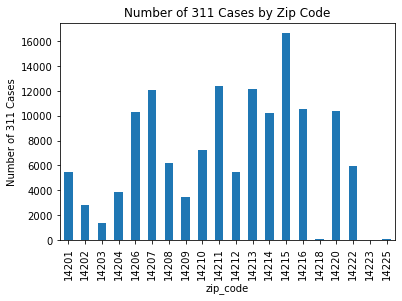

In [37]:
value_zip = assessment_311['Number of 311 cases'].plot.bar()
value_zip.set_ylabel('Number of 311 Cases')
value_zip.set_title('Number of 311 Cases by Zip Code')

Zip code 14215 has the most 311 Service call cases since March 2021.<br>
Zip code 14223 has the least 311 Service call cases since March 2021.

**Average House Value by Zip Code**

Text(0.5, 1.0, 'Average House Value (Dollars) by Zip Code')

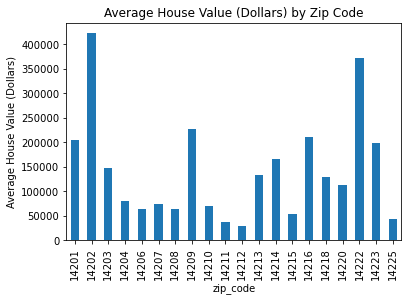

In [38]:
value_zip = assessment_311['Average House Value (Dollars)'].plot.bar()
value_zip.set_ylabel('Average House Value (Dollars)')
value_zip.set_title('Average House Value (Dollars) by Zip Code')

Zip code 14202 has the highest average house value since March 2021.<br>
Zip code 14212 has the least average house value since March 2021.<br>
The 5 zip codes with the highest number of 311 service calls all have an average house value in the lower 53rd percentile.<br>
Zip code 14220 has the 10th highest average house value out of 19 zip codes.

# Linear Regression

**Number of 311 Cases per Zip Code Vs. Average House Value**

In [39]:
from sklearn.linear_model import LinearRegression
X = assessment_311.iloc[:, 0].values.reshape(-1, 1)
Y = assessment_311.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

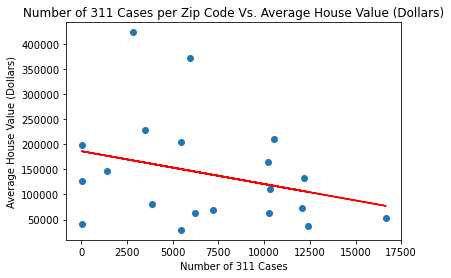

[[-6.54034779]]


In [40]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
# Adding titles and axis labels
plt.title('Number of 311 Cases per Zip Code Vs. Average House Value (Dollars)')
# Adding x and y axis labels
plt.xlabel('Number of 311 Cases')
plt.ylabel('Average House Value (Dollars)')
plt.show()
print(linear_regressor.coef_)

The linear regression line shows a negative correlation between average house price and number of 311 service call cases.<br>
As the number of 311 cases goes up by 1, the average house value decreases by $6.54.

### Do calls regarding rodent control have an impact on average house value?

**Number of Rodent Control Cases per Zip Code Vs. Average House Value**

In [41]:
X = assessment_311['Rodent Control'].values.reshape(-1, 1)
Y = assessment_311['Average House Value (Dollars)'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

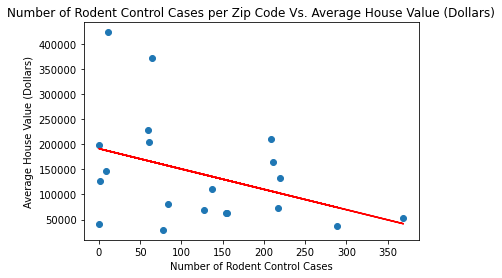

[[-404.83293395]]


In [42]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
# Adding titles and axis labels
plt.title('Number of Rodent Control Cases per Zip Code Vs. Average House Value (Dollars)')
# Adding x and y axis labels
plt.xlabel('Number of Rodent Control Cases')
plt.ylabel('Average House Value (Dollars)')
plt.show()
print(linear_regressor.coef_)

As the number of 311 calls related to rodent control goes up by 1, the average house value decreases by $404.83.

### Do calls regarding moving violations have an impact on average house value?

**Number of Moving Violations per Zip Code Vs. Average House Value**

In [43]:
X = assessment_311['Moving Violations'].values.reshape(-1, 1)
Y = assessment_311['Average House Value (Dollars)'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

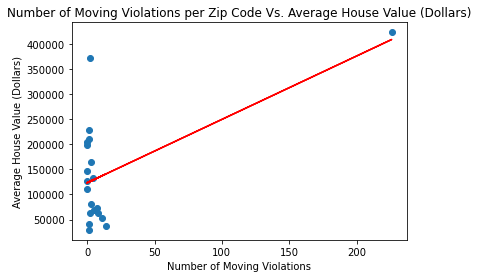

[[1261.40301439]]


In [44]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
# Adding titles and axis labels
plt.title('Number of Moving Violations per Zip Code Vs. Average House Value (Dollars)')
# Adding x and y axis labels
plt.xlabel('Number of Moving Violations')
plt.ylabel('Average House Value (Dollars)')
plt.show()
print(linear_regressor.coef_)

We have certainly found an outlier with more that 200 moving violations.<br>
As the number of 311 calls related to sanitation goes up by 1, the average house value increases by $1261.40 due to this outlier.

### Which zip code had the most moving violations recorded? How many?

In [45]:
# What was the most moving violations recorded?
max_moving_violation = assessment_311['Moving Violations'].max()
max_moving_violation

226

In [46]:
# Which zip code had the most moving violations recorded?
pd.set_option('display.max_columns', None)
assessment_311.loc[assessment_311['Moving Violations'] == max_moving_violation]

,Number of 311 cases,Average House Value (Dollars),Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,Buffalo Water Authority,Buildings Division,COB APP Issues,Citizen Services - Good Neighbor,Citizen Services - Graffiti,Citizen Services - Quick Response Teams,Citizen Services - Save Our Streets,Citizen Services - Weed & Seed,Citizens Services - Clean City,City Clerk Issue,City Parks,Community Based Orgs,Engineering - Street Repairs,Engineering - Traffic,Forestry,Freedom of Information,Harbor Master,Housing,Licenses,Moving Violations,National Grid,OSP,Parking Violations Bureau,Personnel,Police,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau
zip_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14202,2845,422916.8,14,4,9,4,5,11,19,11,14,24,2,0,23,72,1,0,0,64,14,0,267,136,35,0,5,471,2,226,62,10,380,1,63,16,11,4,587,257,1,19,0,1


Zip code 14202 had 226 moving violations reported.

### Would moving voilations still have a positive correlation with average house value without this outlier?

In [47]:
moving_violations_no_outliers = assessment_311.drop(index = '14202', axis = 0)
moving_violations_no_outliers.head()

,Number of 311 cases,Average House Value (Dollars),Adjudication - Ordinance Violation,Administration,Animal Shelter,Assessment,Assessment & Taxation,BFD,BMHA,Buffalo Sewer Authority,Buffalo Water Authority,Buildings Division,COB APP Issues,Citizen Services - Good Neighbor,Citizen Services - Graffiti,Citizen Services - Quick Response Teams,Citizen Services - Save Our Streets,Citizen Services - Weed & Seed,Citizens Services - Clean City,City Clerk Issue,City Parks,Community Based Orgs,Engineering - Street Repairs,Engineering - Traffic,Forestry,Freedom of Information,Harbor Master,Housing,Licenses,Moving Violations,National Grid,OSP,Parking Violations Bureau,Personnel,Police,Real Estate,Rodent Control,Rodent_Pest Control,Sanitation,Streets,Streets/Sanitation,Taxation,Telecommunications,Youth Bureau
zip_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14201,5459,204046.38,13,7,38,0,0,30,22,35,38,1,0,0,21,31,11,0,1,1,15,1,381,95,115,0,0,1016,0,0,180,0,564,0,206,14,61,36,1622,895,4,5,0,0
14203,1397,146488.37,0,1,8,0,0,3,13,9,10,3,0,0,4,28,2,0,0,0,2,0,364,118,10,0,2,181,0,0,101,0,148,1,45,1,8,0,218,115,2,0,0,0
14204,3844,80312.42,5,4,45,2,1,15,140,28,56,3,0,0,4,37,7,0,0,0,4,1,348,161,97,0,0,570,0,3,150,2,233,5,70,15,84,32,1253,455,3,11,0,0
14206,10278,62545.11,25,7,175,0,0,27,16,127,123,8,0,0,5,72,28,0,4,3,38,2,853,203,193,0,0,1947,7,8,327,1,534,4,410,27,154,71,3461,1359,30,29,0,0
14207,12076,73585.36,50,10,196,0,1,31,64,91,159,0,0,1,50,156,33,0,0,1,9,0,1112,215,153,0,0,2056,8,7,302,3,651,13,361,15,217,65,4042,1962,15,27,0,0


**Moving Violations Without Outlier Vs. Average House Value**

In [48]:
X = moving_violations_no_outliers['Moving Violations'].values.reshape(-1, 1)
Y = moving_violations_no_outliers['Average House Value (Dollars)'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

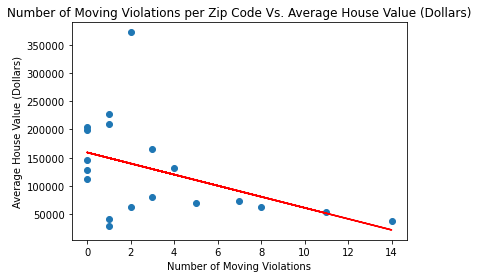

[[-9815.87132432]]


In [49]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
# Adding titles and axis labels
plt.title('Number of Moving Violations per Zip Code Vs. Average House Value (Dollars)')
# Adding x and y axis labels
plt.xlabel('Number of Moving Violations')
plt.ylabel('Average House Value (Dollars)')
plt.show()
print(linear_regressor.coef_)

Prior to removing the outlier, the data led us to believe one of two things: <br>
> Either:<br>
> An increase in the number of moving violations contributed to an increase in housing prices. <br>
> An increase in housing prices contributed to an increase in the number of moving violations.<br>
<br>
**However**, after removing the outlier, we can tell that the number of moving violations would have a negative correlation with average house value if it were not for the outlier.<br>
<br>
This would lead us to investigate if moving violations in zip code 14202 were accuratly reported.<br>
There could potentially be an explaination for the mass amount of moving violations reported in this zip code.<br>
Possibly, zip code 14202 has one or more police stations?

# Let's Explore

In [50]:
df_assessment['prop_class_description'].unique()

array(['CEILING RAILROAD', 'RESIDENTIAL VACANT LAND', 'SCHOOL',
       'APARTMENT', 'CITY/TOWN/VILLAGE PUBLIC PARKS', 'COM VAC W/IMP',
       'TELEPHONE', 'COMMERCIAL VACANT LAND', 'PARKING LOT',
       'TELEPHONE - SPECIAL FRANCHISE', 'MANUFACTURING & PROCESSING',
       'RESIDENTIAL LAND WITH SMALL IMPROVEMENTS', 'OFFICE BUILDING',
       'INDUSTRIAL VACANT LAND', 'DOWNTOWN ROW TYPE (DETACHED)',
       'RELIGIOUS', 'PARKS', 'SMALL GARAGE', 'ONE FAMILY DWELLING',
       'MEDIUM RETAIL', 'TWO FAMILY DWELLING',
       'ONE STORY SMALL STRUCTURE MULTI-OCCUPANT', 'MARINAS',
       'NON-CEILING RAILROADS', 'PARKING LOTS', 'MULTIPLE RESIDENCES',
       'CONVERTED RESIDENCE', 'GAS MEAS STATION',
       'DINERS OR LUNCHEONETTES', 'AUTOMATIC CAR WASH', 'GOLF COURSES',
       'SOCIAL ORGANIZATIONS', 'RESTAURANTS',
       'INNS,LODGES,BOARDING AND ROOMING HOUSES',
       'OTHER STORAGE & WAREHOUSE FACILITIES',
       'RESIDENCE WITH COMMERCIAL USE', 'MISCELLANEOUS SERVICES',
       'AUTO BODY AN

In [51]:
# Filter dataframe to only include Police and Fire Protection Facilities.
police_stations = df_assessment[df_assessment['prop_class_description'] == 'POLICE AND FIRE PROTECTION FACILITIES']

In [52]:
# Selecting only the zip code and property class description columns.
police_stations = police_stations[['zipcode', 'prop_class_description']]

In [53]:
# Counting the number of facilities in each zip code. 
police_stations.groupby('zipcode')['prop_class_description'].count()

zipcode
14201    2
14202    4
14203    4
14204    1
14206    3
14207    3
14208    1
14209    1
14210    4
14211    5
14212    2
14213    2
14215    1
14216    2
14220    2
Name: prop_class_description, dtype: int64

Zip code 14202 is tied for having the second most 'Police and Fire Protection Facilities' with 4 locations.<br>
This could be a reason why zip code 14202 has the most moving violations.<br>
**However**, this zip code has 226 moving violations and the zip code with the second most moving violations only has 14.<br> There are most likely other contributors.<br>
<br>
The data does not reveal if these stations are related to the police or fire protection. <br>
Therefor, zip code 14202 could potentially have the most police stations in Buffalo, but it is not certain.<br>

**Conculsion:**<br>
There are a relatively high number of 'Police and Fire Protection Facilities' in zip code 14202 which at least partially contributes to its high number of moving violations.